In [3]:
#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.
#
# 2017/03/04 Ryan Robucci - changed plot raduis to expand to 10% beyond largest root real/imag component and and manage ticks

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    #RWR: the following has been modified to fit larger-magnitude roots and manage ticks
    r = 1.1*max(1.5/1.1,np.abs(np.concatenate((p.real,p.imag,z.real,z.imag))).max()); 
    plt.axis('scaled');
    if r<1.6:
        ticks = [-1, -.5, .5, 1]; 
    elif r<5:
        ticks = [-2,-1, -.5, .5, 1,2]; 
    elif r<10:
        ticks = [-5,-2,-1,1,2,5]; 
    elif r<20:
        ticks = [-10,-1,1,10]; 
    else:
        rlog = np.ceil(np.log10(r))
        ticks = np.arange(-(10**rlog),(10**rlog)+1,10**(rlog-1)*2); 
    
    plt.xticks(ticks);
    plt.yticks(ticks)
    plt.axis([-r, r, -r, r])

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

In [51]:
import numpy as np
#             z^-1 + z^-2 
# H(z)=  --------------------
#          1+.25z^-1-.375z^-2
b = np.array([1,-2.8538,3.8446,-2.8538,1.2656])
a = np.array([1.0])
print(a)
print(b)
#b = np.array([0,1,1])
#a = np.array([1.0,0.25,-0.375])
#print(b)
#print(a)

[1.]
[ 1.     -2.8538  3.8446 -2.8538  1.2656]


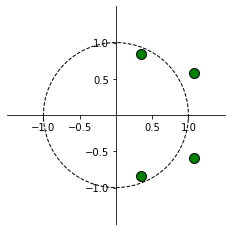

In [55]:
zplane(b,a)
plt.show()

In [6]:
from scipy import signal #https://docs.scipy.org/doc/scipy-0.18.1/reference/signal.html

In [60]:
w, H = signal.freqz(b,a)
print(w)
len(w)

[0.         0.00613592 0.01227185 0.01840777 0.02454369 0.03067962
 0.03681554 0.04295146 0.04908739 0.05522331 0.06135923 0.06749515
 0.07363108 0.079767   0.08590292 0.09203885 0.09817477 0.10431069
 0.11044662 0.11658254 0.12271846 0.12885439 0.13499031 0.14112623
 0.14726216 0.15339808 0.159534   0.16566993 0.17180585 0.17794177
 0.18407769 0.19021362 0.19634954 0.20248546 0.20862139 0.21475731
 0.22089323 0.22702916 0.23316508 0.239301   0.24543693 0.25157285
 0.25770877 0.2638447  0.26998062 0.27611654 0.28225246 0.28838839
 0.29452431 0.30066023 0.30679616 0.31293208 0.319068   0.32520393
 0.33133985 0.33747577 0.3436117  0.34974762 0.35588354 0.36201947
 0.36815539 0.37429131 0.38042724 0.38656316 0.39269908 0.398835
 0.40497093 0.41110685 0.41724277 0.4233787  0.42951462 0.43565054
 0.44178647 0.44792239 0.45405831 0.46019424 0.46633016 0.47246608
 0.47860201 0.48473793 0.49087385 0.49700978 0.5031457  0.50928162
 0.51541754 0.52155347 0.52768939 0.53382531 0.53996124 0.546097

512

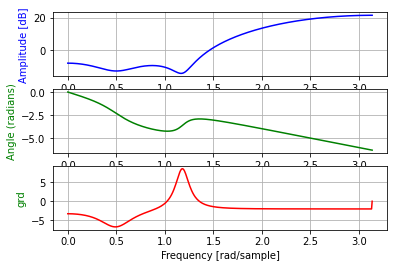

[ 0.         -0.02036862 -0.04074258 -0.06112723 -0.08152794 -0.1019501
 -0.12239913 -0.1428805  -0.16339973 -0.1839624  -0.20457415 -0.2252407
 -0.24596786 -0.26676153 -0.28762772 -0.30857255 -0.32960225 -0.3507232
 -0.37194192 -0.39326507 -0.41469948 -0.43625214 -0.45793024 -0.47974114
 -0.50169241 -0.52379184 -0.54604742 -0.56846739 -0.59106022 -0.61383463
 -0.63679959 -0.65996436 -0.68333844 -0.70693163 -0.73075401 -0.75481596
 -0.77912813 -0.80370147 -0.82854724 -0.85367696 -0.87910245 -0.90483579
 -0.93088932 -0.95727563 -0.9840075  -1.01109791 -1.03855998 -1.06640696
 -1.09465212 -1.12330876 -1.15239008 -1.18190913 -1.21187871 -1.24231129
 -1.27321885 -1.30461276 -1.33650366 -1.36890129 -1.40181431 -1.43525008
 -1.46921455 -1.50371195 -1.53874463 -1.57431282 -1.61041439 -1.64704466
 -1.68419612 -1.72185831 -1.76001754 -1.79865681 -1.83775566 -1.87729008
 -1.91723247 -1.9575517  -1.99821316 -2.03917893 -2.08040799 -2.12185648
 -2.16347807 -2.20522435 -2.24704529 -2.28888973 -2.33

In [62]:
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()
abs(H)
print(angles)

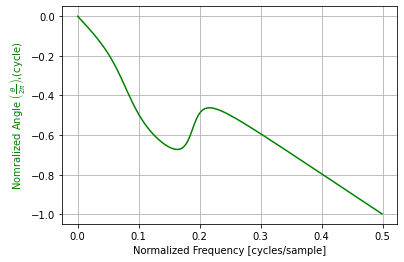

In [9]:
plt.figure()
angles = np.unwrap(np.angle(H))
plt.plot(w/(2*np.pi), angles/(2*np.pi), 'g')
plt.ylabel(r'Nomralized Angle $\left(\frac{\theta}{2\pi}\right)$,(cycle)', color='g')
plt.xlabel('Normalized Frequency [cycles/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()

In [10]:
b=np.array([1,2,2,1])
a=np.array([1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


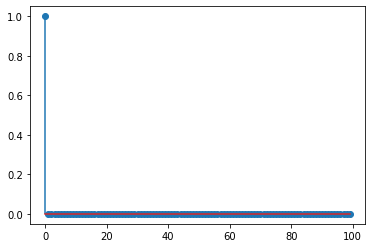

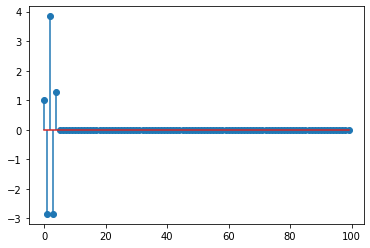

In [63]:
def delta(pos,len):
    x  = np.zeros(len)
    x[pos] = 1.0
    return x

imp = delta(0,100)
print(imp)
plt.stem(imp)
plt.show()
h_ = signal.lfilter(b,a,imp)
plt.stem(h_)
plt.show()

In [12]:
[z,p,g] = signal.tf2zpk(b, a)
print('P:',p)
print('Z:',z)
print('G:',g)
[b,a] = signal.zpk2tf(z, p*10, g)
print('b:',b)
print('a:',a)

P: []
Z: [-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
G: 1.0
b: [1. 2. 2. 1.]
a: [1.]


In [13]:
n_ = np.arange(10000) # creates a sequence 0 to 9999
s_ = np.sin(2*np.pi*.125*n_)

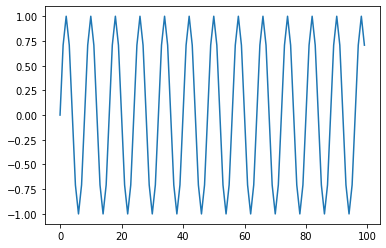

In [14]:
plt.plot(n_[0:100],s_[0:100])
plt.show()

In [15]:
y1_ = np.convolve(s_,h_,'same') ##mode = "full" "same" "valid" 

In [16]:
len(y1_)

10000

In [17]:
y2_ = signal.lfilter(b,a,s_)

In [18]:
len(y2_)

10000

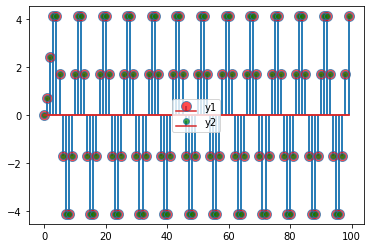

In [19]:
markerline, stemlines, baseline = plt.stem(n_[:100],y2_[:100],label='y1') #like matlab stem
plt.setp(markerline, 'markerfacecolor', 'r','alpha',0.7,'markersize',10)
#plt.setp(baseline, 'color','r', 'linewidth', 2)
markerline, stemlines, baseline = plt.stem(n_[:100],y2_[:100],label='y2')
plt.setp(markerline, 'markerfacecolor', 'g','alpha',0.7)
plt.legend()
plt.show()

In [20]:
import numpy as np
S = np.fft.fft(s_) # https://docs.scipy.org/doc/numpy/reference/routines.fft.html
Y = np.fft.fft(y2_)

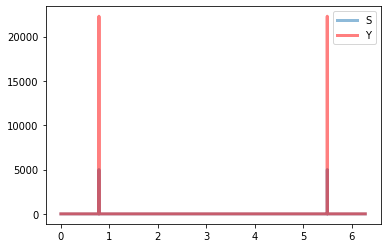

In [21]:
omega = 2 * np.pi * np.arange(len(S))/len(S)
plt.plot(omega,np.abs(S), label = 'S',linewidth=3,alpha=.5) # in matlab extra arguments are 'DisplayName','S'
plt.plot(omega,np.abs(Y), label = 'Y',linewidth=3,alpha=.5,color='r')
plt.legend()
plt.axis('tight')
plt.show()

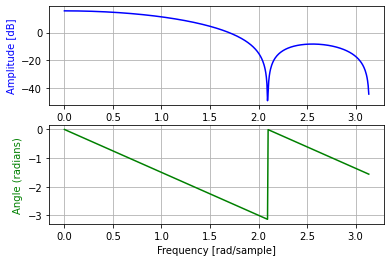

In [22]:
w,H = signal.freqz(b,a)
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(212)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()

In [23]:
len(omega)

10000

In [24]:
len(S)

10000

In [25]:
len(y2_)

10000

In [26]:
#Here, I will use correlation to find the lag of the output signal from the response
#this is valid since I am correlating two signals that are very long compared to the lag range I will examine, otherwise I would have to consider bias
a = np.correlate(s_-np.mean(s_), y2_-np.mean(y2_), mode='full') #mode = "full" "same" "valid" 
lags = np.arange(-(len(y2_)),len(s_))

In [27]:
a = np.correlate(s_-np.mean(s_), y2_-np.mean(y2_), mode='full') #mode = "full" "same" "valid" 
lags = np.arange(-(len(y2_)),len(s_))

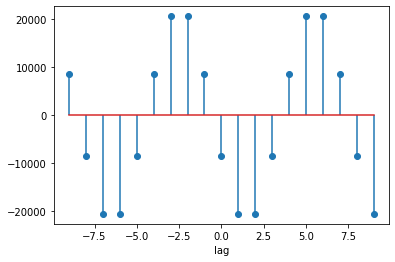

In [28]:
ind = np.where((lags<10) & (lags>-10)) #matlab find
plt.stem(lags[ind],a[ind])
plt.xlabel('lag')
plt.show()

In [29]:
print(w)

[0.         0.00613592 0.01227185 0.01840777 0.02454369 0.03067962
 0.03681554 0.04295146 0.04908739 0.05522331 0.06135923 0.06749515
 0.07363108 0.079767   0.08590292 0.09203885 0.09817477 0.10431069
 0.11044662 0.11658254 0.12271846 0.12885439 0.13499031 0.14112623
 0.14726216 0.15339808 0.159534   0.16566993 0.17180585 0.17794177
 0.18407769 0.19021362 0.19634954 0.20248546 0.20862139 0.21475731
 0.22089323 0.22702916 0.23316508 0.239301   0.24543693 0.25157285
 0.25770877 0.2638447  0.26998062 0.27611654 0.28225246 0.28838839
 0.29452431 0.30066023 0.30679616 0.31293208 0.319068   0.32520393
 0.33133985 0.33747577 0.3436117  0.34974762 0.35588354 0.36201947
 0.36815539 0.37429131 0.38042724 0.38656316 0.39269908 0.398835
 0.40497093 0.41110685 0.41724277 0.4233787  0.42951462 0.43565054
 0.44178647 0.44792239 0.45405831 0.46019424 0.46633016 0.47246608
 0.47860201 0.48473793 0.49087385 0.49700978 0.5031457  0.50928162
 0.51541754 0.52155347 0.52768939 0.53382531 0.53996124 0.546097

In [84]:
b = np.array([1])
a = np.array([1,-1])
print(a)
print(b)
#b = np.array([0,1,1])
#a = np.array([1.0,0.25,-0.375])
#print(b)
#print(a)


[ 1 -1]
[1]


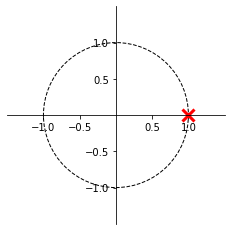

In [85]:
zplane(b,a)
plt.show()

In [86]:
w, H = signal.freqz(b,a)
print(w)
len(w)

[0.         0.00613592 0.01227185 0.01840777 0.02454369 0.03067962
 0.03681554 0.04295146 0.04908739 0.05522331 0.06135923 0.06749515
 0.07363108 0.079767   0.08590292 0.09203885 0.09817477 0.10431069
 0.11044662 0.11658254 0.12271846 0.12885439 0.13499031 0.14112623
 0.14726216 0.15339808 0.159534   0.16566993 0.17180585 0.17794177
 0.18407769 0.19021362 0.19634954 0.20248546 0.20862139 0.21475731
 0.22089323 0.22702916 0.23316508 0.239301   0.24543693 0.25157285
 0.25770877 0.2638447  0.26998062 0.27611654 0.28225246 0.28838839
 0.29452431 0.30066023 0.30679616 0.31293208 0.319068   0.32520393
 0.33133985 0.33747577 0.3436117  0.34974762 0.35588354 0.36201947
 0.36815539 0.37429131 0.38042724 0.38656316 0.39269908 0.398835
 0.40497093 0.41110685 0.41724277 0.4233787  0.42951462 0.43565054
 0.44178647 0.44792239 0.45405831 0.46019424 0.46633016 0.47246608
 0.47860201 0.48473793 0.49087385 0.49700978 0.5031457  0.50928162
 0.51541754 0.52155347 0.52768939 0.53382531 0.53996124 0.546097

c:\users\bl888078\appdata\local\programs\python\python39\lib\site-packages\scipy\signal\filter_design.py:474: RuntimeWarning: divide by zero encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /
c:\users\bl888078\appdata\local\programs\python\python39\lib\site-packages\scipy\signal\filter_design.py:474: RuntimeWarning: invalid value encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /


512

c:\users\bl888078\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:1540: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi


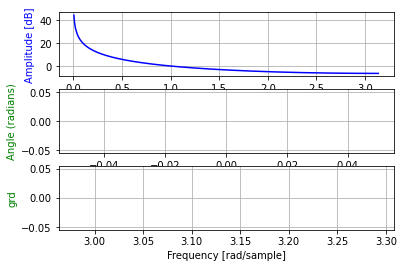

[         inf 162.97491739  81.48784219  54.32565424  40.7446881
  32.5962107   27.16397766  23.28388427  20.37387817  18.11059692
  16.30002309  14.81869101  13.58429026  12.53983668  11.64462733
  10.86881335  10.19000812   9.59109247   9.05875145   8.58247331
   8.1538486    7.76606971   7.41356676   7.09173853   6.79675071
   6.52538245   6.27490841   6.04300703   5.82768838   5.62723701
   5.44016622   5.26518109   5.10114862   4.94707311   4.80207601
   4.66537918   4.53629094   4.41419438   4.29853753   4.18882503
   4.08461108   3.98549333   3.89110779   3.8011243    3.71524274
   3.63318964   3.55471533   3.47959139   3.40760842   3.33857412
   3.27231159   3.20865778   3.14746219   3.08858569   3.03189945
   2.97728401   2.92462843   2.87382957   2.8247914    2.77742441
   2.73164503   2.6873752    2.64454188   2.60307667   2.56291545
   2.52399804   2.48626791   2.44967191   2.41416      2.37968506
   2.34620266   2.31367086   2.28205007   2.25130284   2.22139378
   2.192289

In [87]:
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()
print(abs(H))

[ 1.   -0.99]
[0 1]


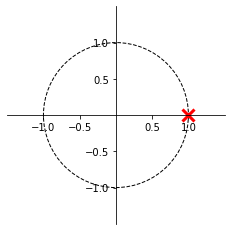

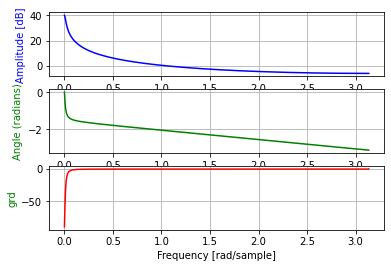

In [116]:
b = np.array([0,1])
a = np.array([1,-0.99])
print(a)
print(b)
#b = np.array([0,1,1])
#a = np.array([1.0,0.25,-0.375])
#print(b)
#print(a)
zplane(b,a)
plt.show()
w, H = signal.freqz(b,a)
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()
#print(angles)
oldangles=angles

[ 1.   -0.99]
[1]


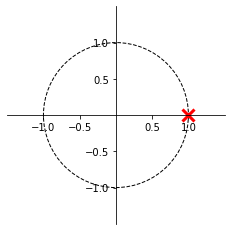

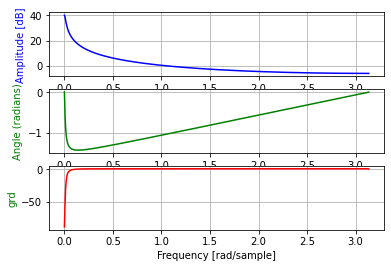

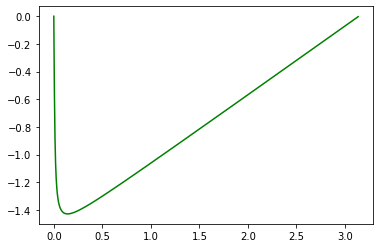

In [114]:
b = np.array([1])
a = np.array([1,-0.99])
print(a)
print(b)
#b = np.array([0,1,1])
#a = np.array([1.0,0.25,-0.375])
#print(b)
#print(a)
zplane(b,a)
plt.show()
w, H = signal.freqz(b,a)
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()
#print(angles-oldangles)

plt.plot(w, angles, 'g')

[ 1.    0.   -0.99]
[0 1]


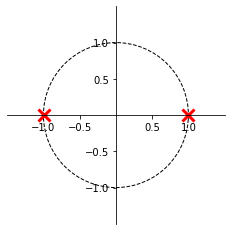

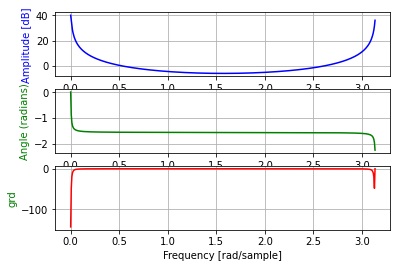

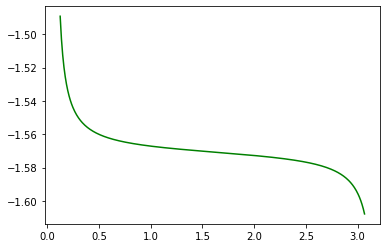

In [112]:
b = np.array([0,1])
a = np.array([1,0,-0.99])
print(a)
print(b)
#b = np.array([0,1,1])
#a = np.array([1.0,0.25,-0.375])
#print(b)
#print(a)
zplane(b,a)
plt.show()
w, H = signal.freqz(b,a)
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()





#print(angles-oldangles)
plt.plot(w[20:501], angles[10:491], 'g')
